# How to Succeed at Speed Dating <br>Without Really Trying 

<img src="speed_dating_art.jpg" alt="Drawing" style="width: 400px; height:200px">

## Unit 3 Data Science Capstone <br> by Vincent Gomez


The assignment: 

First: Find a dataset of interest. 

Second: Explore the data set and find some interesting insights.

Third: Make prediction models for an outcome of interest.

[Speed Dating on Kaggle](https://www.kaggle.com/annavictoria/speed-dating-experiment)  (Montoya, A. 2015)

Columbia Business School professors Ray Fisman and Sheena Iyengar.


21 experimental speed dating events from 2002-2004 

Four minute "first dates" 

<img src="Four_Minute_Timer.png"alt="Drawing" style="width: 200px">


Available Data:

Attribute Scores- Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests

Importance Scores for each attribute

Precieved Importance Scores of the opposite sex

Self-perceived scores for each attribute

Demographics- age, race, location, career field/major, income 

Lifestyle information- hobbies, interests, dating habits

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from matplotlib.gridspec import GridSpec
import textwrap
from sklearn import ensemble
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.ensemble import RandomForestClassifier # for random forest classifier

%matplotlib inline

In [2]:
speed_dating_download = pd.read_csv('Speed Dating Data.csv',encoding="latin-1")

In [3]:
speed_dating = speed_dating_download.copy()

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

speed_dating

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.00,20.00,20.00,20.00,0.00,5.00,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.00,0.00,0.00,40.00,0.00,0.00,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.00,18.00,19.00,18.00,14.00,12.00,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.00,5.00,15.00,40.00,5.00,

In [5]:
speed_dating2 = speed_dating_download.copy()

In [6]:
speed_dating['gender'] = speed_dating['gender'].map({0:'Female', 1:'Male'})
speed_dating['length'] = speed_dating['length'].map({1:'Too Short', 2:'Too Long', 3:'Just Right'})
speed_dating['numdat_2'] = speed_dating['numdat_2'].map({1:'Too Few', 2:'Too Many', 3:'Just Enough'})
speed_dating['race'] = speed_dating['race'].map({1:'Black', 2:'White', 3:'Latino', 4:'Asian', 5:'Native American', 6:'Other'})
speed_dating['goal'] = speed_dating['goal'].map({1:'Seemed like a fun night out', 2:'To meet new people',
                                                3:'To get a date', 4:'Looking for a serious relationship',
                                                5:'To say I did it', 6:'Other'})

In [7]:
data = speed_dating.groupby(['iid']).first()

Key Questions:

What is the most important attribute in getting that first date?

Is there a difference in what men and women find important in a partner?

How can I make myself more 'marketable' in the dating scene?

Exploring the Data...

There were 551 participants.
274 women and 277 men.


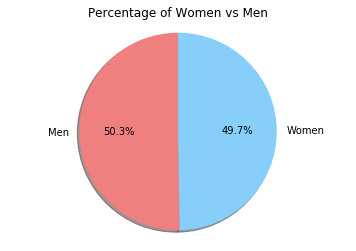

Each person met 10-20 potential matches - 4184 speed dates.


In [8]:
women_data = speed_dating[speed_dating.gender == 'Female']
men_data = speed_dating[speed_dating.gender == 'Male']

print('There were {} participants.\n{} women and {} men.'.format(speed_dating.iid.nunique(),
                                                               women_data.iid.nunique(),
                                                               men_data.iid.nunique()))
# Data to plot
labels = 'Men', 'Women'
sizes = [men_data.iid.nunique() , women_data.iid.nunique()]
colors = ['lightcoral', 'lightskyblue']
explode = ( 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes,  explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Percentage of Women vs Men')
plt.axis('equal')
plt.show()

print('Each person met 10-20 potential matches - {} speed dates.'.format(women_data.shape[0]))

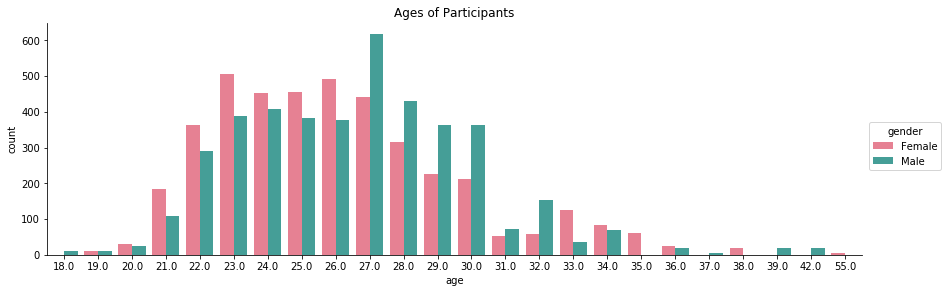

In [9]:
sns.factorplot(x="age", hue='gender', data=speed_dating, 
               kind='count',size=4, aspect=3, palette="husl")
plt.title('Ages of Participants')
plt.show()

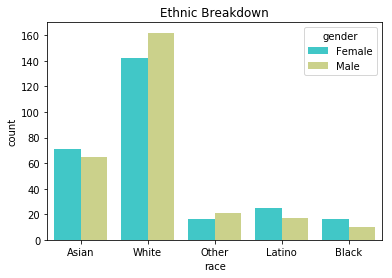

In [10]:
sns.countplot(x="race", data=data, hue='gender', palette="rainbow")
plt.title('Ethnic Breakdown')
plt.show()


There were over 200 different majors. These were the top 20 most popular ones...


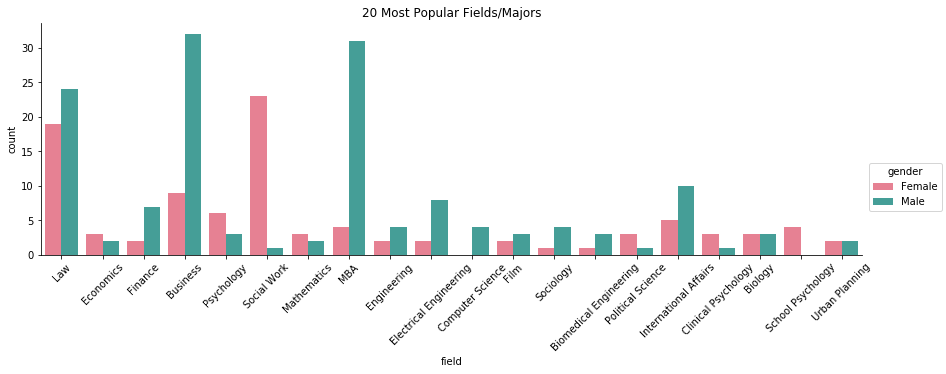

In [11]:
print("There were over 200 different majors. These were the top 20 most popular ones...")

data = speed_dating.groupby(['iid']).first()

data['field'] = data['field'].replace('business', 'Business').replace('law','Law')

top_10_fields = data.field.value_counts().head(n=20)

top_10_fields = data.loc[data.field.isin(list(top_10_fields.index)), :]

g = sns.factorplot(x="field", hue='gender', data=top_10_fields, 
               kind='count',size=4, aspect=3, palette="husl")
g.set_xticklabels(rotation=45)
plt.title('20 Most Popular Fields/Majors')
plt.show()


Here are the raw numbers of YES's and NO's given...


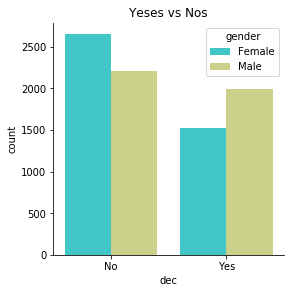

In [12]:
print('Here are the raw numbers of YES\'s and NO\'s given...')

g = sns.factorplot(x="dec", hue='gender', data=speed_dating, 
               kind='count', palette="rainbow", legend_out = False)

plt.title('Yeses vs Nos')

g.set_xticklabels(['No','Yes'])

plt.show()

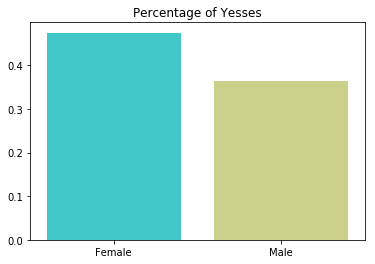

Women had a 47.5% chance of getting a yes while men had a 36.5% chance.


In [13]:
men_percent = speed_dating.loc[(speed_dating.gender == 'Male'), :].dec_o.mean()
women_percent = speed_dating.loc[(speed_dating.gender == 'Female') , :].dec_o.mean()

gender_yes_averages = [women_percent, men_percent]
genders = ['Female','Male']

sns.barplot(x=genders, y=gender_yes_averages, palette = 'rainbow')

plt.title('Percentage of Yesses')

plt.show()

print('Women had a {:.1%} chance of getting a yes while men had a {:.1%} chance.'.format(women_percent, men_percent))

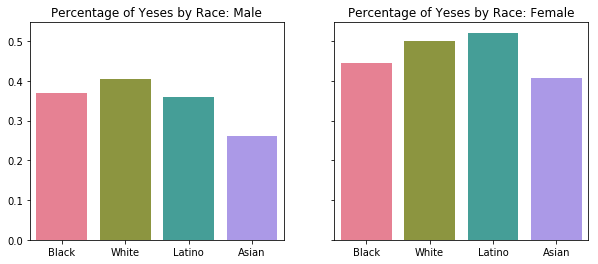

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4), sharey=True)

races = ['Black', 'White', 'Latino', 'Asian']
ethnicity_yes_average = []
for race in races:
    ethnicity_yes_average.append(speed_dating.loc[((speed_dating.gender == 'Male') & (speed_dating.race == race)), :].dec_o.mean())

sns.barplot(x=races, y=ethnicity_yes_average, ax=ax1, palette='husl')
ax1.set_title('Percentage of Yeses by Race: Male')

races = ['Black', 'White', 'Latino', 'Asian']
ethnicity_yes_average = []
for race in races:
    ethnicity_yes_average.append(speed_dating.loc[((speed_dating.gender == 'Female') & (speed_dating.race == race)), :].dec_o.mean())

sns.barplot(x=races, y=ethnicity_yes_average, ax=ax2, palette='husl')
ax2.set_title('Percentage of Yeses by Race: Female')
plt.show()

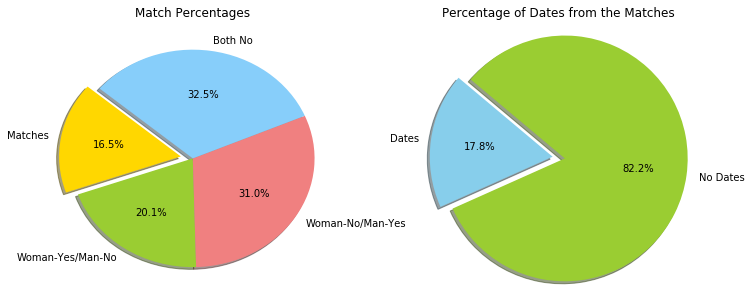

In [15]:
total = women_data.shape[0]
matches = women_data.loc[((women_data.dec_o == 1) & (women_data.dec == 1)),:].shape[0]

womanY_manN = women_data.loc[((women_data.dec_o == 0) & (women_data.dec == 1)),:].shape[0]

womanN_manY = women_data.loc[((women_data.dec_o == 1) & (women_data.dec == 0)),:].shape[0]

bothN = women_data.loc[((women_data.dec_o == 0) & (women_data.dec == 0)),:].shape[0]

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 5))
# Data to plot
labels = 'Matches', 'Woman-Yes/Man-No', 'Woman-No/Man-Yes', 'Both No'
sizes = [matches, womanY_manN, womanN_manY, bothN]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
ax1.pie(sizes,  explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

ax1.set_title('Match Percentages')
plt.axis('equal')

ax2.pie([17.8,82.2],  explode=[0.1,0], labels=['Dates', 'No Dates'], colors=['skyblue', 'yellowgreen'],
        autopct='%1.1f%%', shadow=True, startangle=140)

ax2.set_title('Percentage of Dates from the Matches')
plt.axis('equal')

# fig.subplots_adjust(wspace=1)

plt.show()

Only 3% of the speed dates resulted in actual dates!


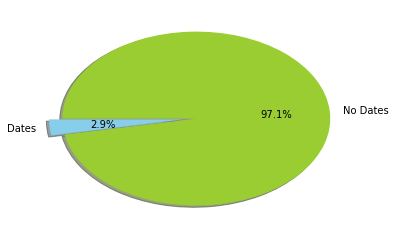

In [16]:
print("Only 3% of the speed dates resulted in actual dates!")

plt.pie([0.02937,0.97063],  explode=[0.1,0], labels=['Dates', 'No Dates'], colors=['skyblue', 'yellowgreen'],
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.show()

# Predictive Models!!!

My features:

- The 6 attribute scores: Attraction, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.
- The overall 'like' score.
- Gender

My outcome:

- The 'dec'- Yes or No?

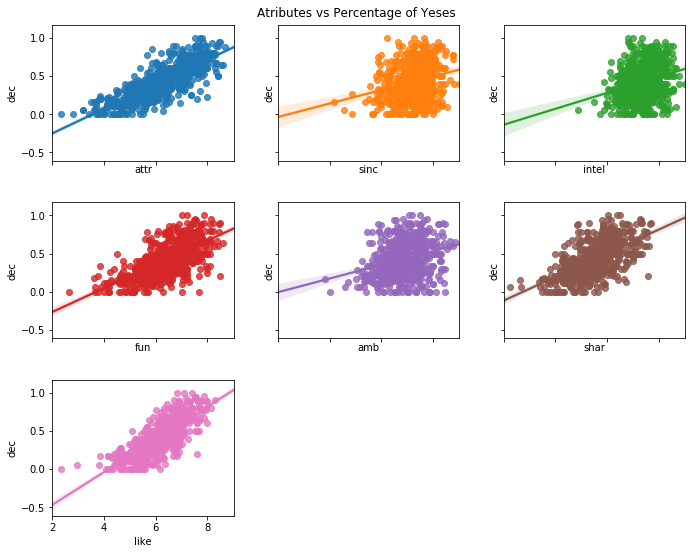

In [35]:
speed_dating2 = speed_dating_download.copy()
score_averages = speed_dating2.groupby(['pid'])['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'dec','gender'].mean().dropna()

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex=True, sharey=True) 
fig.tight_layout()
fig.set_size_inches(10, 8)
sns.regplot(x=score_averages.attr , y=score_averages.dec, ax=ax1)
sns.regplot(x=score_averages.sinc , y=score_averages.dec, ax=ax2)
sns.regplot(x=score_averages.intel , y=score_averages.dec, ax=ax3)
sns.regplot(x=score_averages.fun , y=score_averages.dec, ax=ax4)
sns.regplot(x=score_averages.amb , y=score_averages.dec, ax=ax5)
sns.regplot(x=score_averages.shar , y=score_averages.dec, ax=ax6)
sns.regplot(x=score_averages.like , y=score_averages.dec, ax=ax7)
fig.delaxes(ax8)
fig.delaxes(ax9)
fig.suptitle('Atributes vs Percentage of Yeses')

plt.show()

Here is how the men and women scored each other on these 6 attributes 
and the like score...


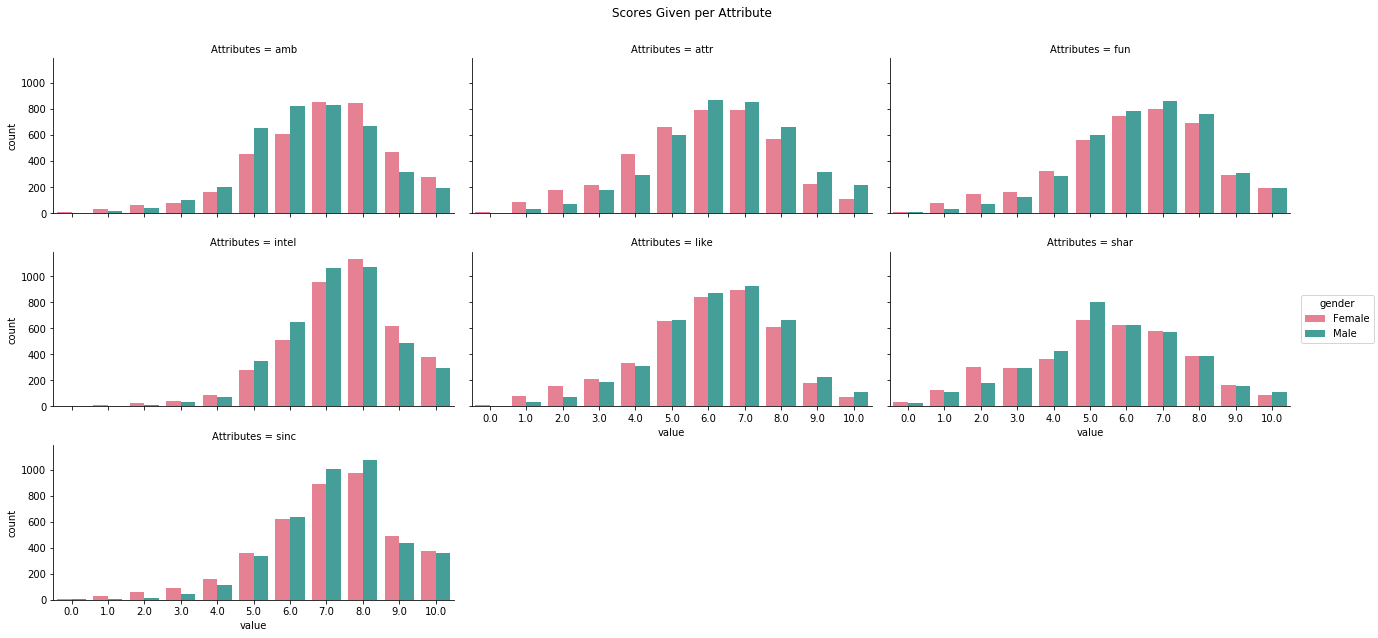

In [18]:
print('Here is how the men and women scored each other on these 6 attributes \nand the like score...')

experiment = speed_dating.loc[:,['iid','pid','gender', 'attr','amb','sinc','intel','fun','shar','like']]
experiment2 = pd.pivot_table(experiment,index=["iid",'gender', "pid"])
experiment2_stacked = experiment2.stack()
experiment2_stacked.index.set_names('Attributes', level=len(experiment2_stacked.index.names)-1, inplace=True)
experiment2_stacked = experiment2_stacked.reset_index().rename(columns={0:'value'})
experiment2_stacked = experiment2_stacked[experiment2_stacked['value']%1 == 0]
g = sns.factorplot(x="value", hue="gender", col="Attributes",
                   data=experiment2_stacked, kind="count",
                   size=3, aspect=2, col_wrap=3, palette='husl')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scores Given per Attribute')
plt.show()

# Predictive Model- Decision Tree

<img src="DecisionTreeNodes.png" alt="Drawing" style="width: 600px; height:300px">



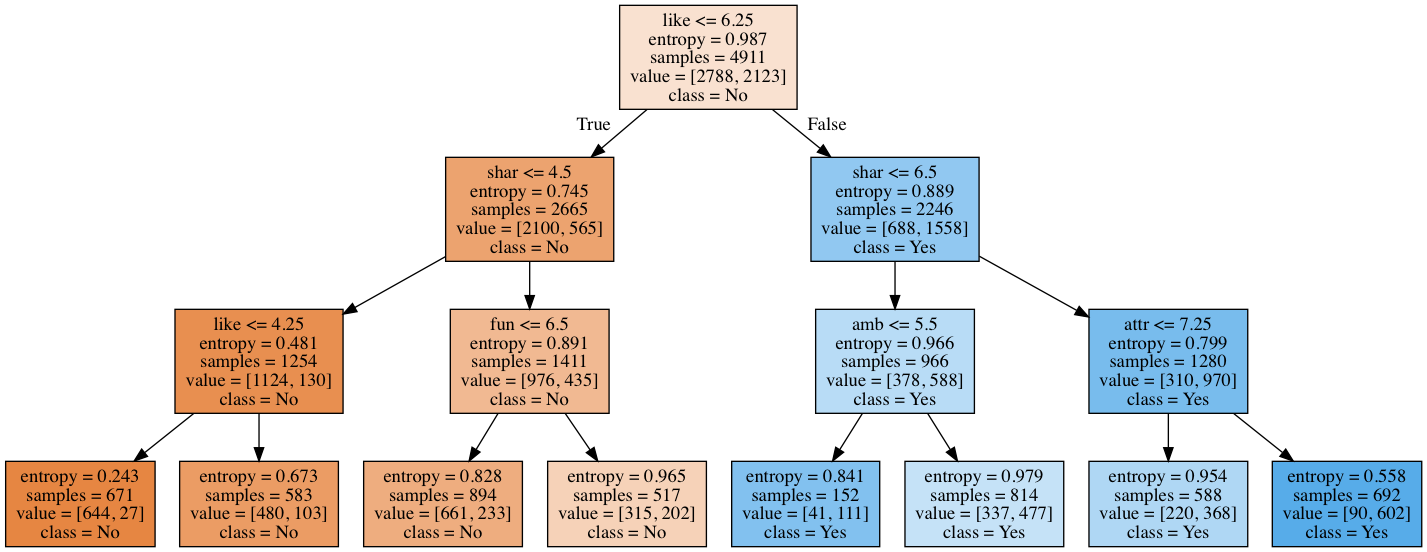

In [38]:
speed_dating2 = speed_dating_download.copy()

speed_dating1 = speed_dating2[['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']].dropna()
#now split our data into train and test
train, test = train_test_split(speed_dating1, test_size = 0.3)# in this our main data is splitted into train and test


train_X = train[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']]# taking the training data input 
train_y= train.dec# This is output of our training data
# same we have to do for test
test_X= test[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']] # taking test data inputs
test_y = test.dec   #output value of test data
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=4,
    max_depth=3,
)
decision_tree.fit(train_X,train_y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=train_X.columns,
    class_names=['No', 'Yes'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [37]:
# ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']

decision_tree.predict(np.asarray([7, 3, 2, 5, 2, 3, 10, 1]).reshape(1, -1))

array([1])

# Predictive Model- Random Forest

<img src="forest.png" alt="Drawing" style="width: 500px; height:300px">

Accuracy Result from Random Forest Classifier:
0.760208926876


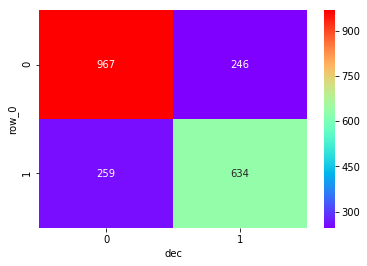

In [21]:
speed_dating2 = speed_dating_download.copy()

speed_dating1 = speed_dating2[['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']].dropna()
#now split our data into train and test
train, test = train_test_split(speed_dating1, test_size = 0.3)# in this our main data is splitted into train and test

print('Accuracy Result from Random Forest Classifier:')



train_X = train[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']]# taking the training data input 
train_y= train.dec# This is output of our training data

# same we have to do for test
test_X= test[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']] # taking test data inputs
test_y = test.dec   #output value of test data

model=RandomForestClassifier(n_estimators=100)# a simple random forest model

model.fit(train_X,train_y)

prediction = model.predict(test_X)

print(metrics.accuracy_score(prediction,test_y))

from sklearn.metrics import confusion_matrix

sns.heatmap(pd.crosstab(prediction,test_y), annot=True, fmt="d", cmap='rainbow')
plt.show()

List of Feature Importance based off of Gradient Boosting Classifier:


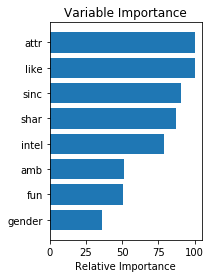

Accuracy score: 0.7535612535612536


In [22]:
print('List of Feature Importance based off of Gradient Boosting Classifier:')

from sklearn import ensemble

speed_dating2 = speed_dating_download.copy()


speed_dating1 = speed_dating2[['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']].dropna()
#now split our data into train and test

train, test = train_test_split(speed_dating1, test_size = 0.3)


train_X = train[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']]# taking the training data input 
train_y= train.dec# This is output of our training data

# same we have to do for test
test_X= test[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']] # taking test data inputs
test_y = test.dec   #output value of test data

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}


# Initialize and fit the model.
clf1 = ensemble.GradientBoostingClassifier(**params)
clf1.fit(train_X, train_y)

feature_importance = clf1.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

prediction = clf1.predict(test_X)
print('Accuracy score: {}'.format(metrics.accuracy_score(prediction,test_y)))

Adding more features...

1\) Attribute Importance Ratings 

2\) Self Ratings

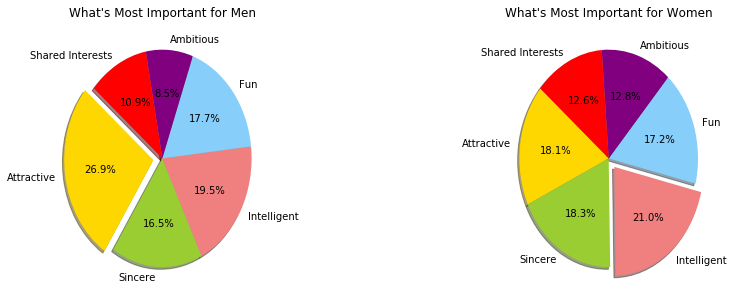

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 5))

attr_sum = men_data.attr1_1.sum()
sinc_sum = men_data.sinc1_1.sum()
intell_sum = men_data.intel1_1.sum()
fun_sum = men_data.fun1_1.sum()
amb_sum = men_data.amb1_1.sum()
shar_sum = men_data.shar1_1.sum()

# Data to plot
labels = 'Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests'
sizes = [attr_sum, sinc_sum, intell_sum, fun_sum, amb_sum, shar_sum]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple', 'red']
explode = (0.1, 0, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
ax1.pie(sizes,  explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax1.set_title('What\'s Most Important for Men')
 
# plt.axis('equal')

attr_sum = women_data.attr1_1.sum()
sinc_sum = women_data.sinc1_1.sum()
intell_sum = women_data.intel1_1.sum()
fun_sum = women_data.fun1_1.sum()
amb_sum = women_data.amb1_1.sum()
shar_sum = women_data.shar1_1.sum()

# Data to plot
labels = 'Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests'
sizes = [attr_sum, sinc_sum, intell_sum, fun_sum, amb_sum, shar_sum]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple', 'red']
explode = (0, 0, 0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
ax2.pie(sizes,  explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
ax2.set_title('What\'s Most Important for Women')
 
# plt.axis('equal')
fig.subplots_adjust(wspace=1)
plt.show()

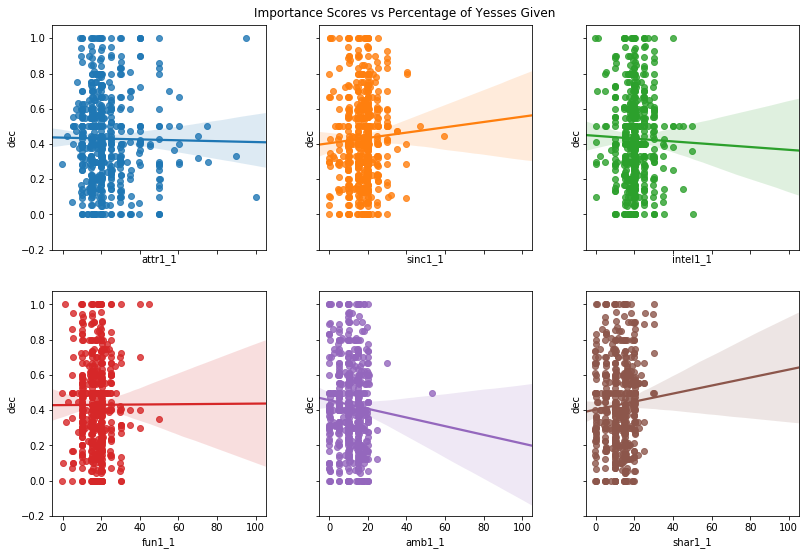

In [24]:
speed_dating2 = speed_dating_download.copy()
score_averages = speed_dating2.groupby(['iid'])['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1','shar1_1','dec'].mean().dropna()

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, sharey=True)
fig.tight_layout()
fig.set_size_inches(12, 8)
sns.regplot(x=score_averages.attr1_1 , y=score_averages.dec,x_jitter=0.3, ax=ax1)
sns.regplot(x=score_averages.sinc1_1 , y=score_averages.dec,x_jitter=0.3, ax=ax2)
sns.regplot(x=score_averages.intel1_1 , y=score_averages.dec,x_jitter=0.3, ax=ax3)
sns.regplot(x=score_averages.fun1_1 , y=score_averages.dec,x_jitter=0.3, ax=ax4)
sns.regplot(x=score_averages.amb1_1 , y=score_averages.dec,x_jitter=0.3, ax=ax5)
sns.regplot(x=score_averages.shar1_1 , y=score_averages.dec,x_jitter=0.3, ax=ax6)
fig.suptitle('Importance Scores vs Percentage of Yesses Given')

plt.show()

In [25]:
speed_dating2 = speed_dating_download.copy()

speed_dating2 = speed_dating2[['dec', 'prob','attr1_1','amb1_1','sinc1_1','intel1_1',
                               'fun1_1','shar1_1','gender']].dropna()

train, test = train_test_split(speed_dating2, test_size = 0.3)


train_X = train[['attr1_1','amb1_1','sinc1_1','intel1_1','fun1_1','shar1_1','gender']]# taking the training data input 
train_y= train.dec# This is output of our training data

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}


# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(train_X, train_y)

test_X = test[['attr1_1','amb1_1','sinc1_1','intel1_1','fun1_1','shar1_1','gender']]# taking the training data input 
test_y= test.dec# This is output of our training data



pred_y = clf.predict(test_X)

# Accuracy table.
table = pd.crosstab(test_y, pred_y)

print('Using Personal Attribute Importance scores to predict giving a Yes or No:')
print("Accuracy Score = {}\n".format((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum())))



Using Personal Attribute Importance scores to predict giving a Yes or No:
Accuracy Score = 0.621859296482412



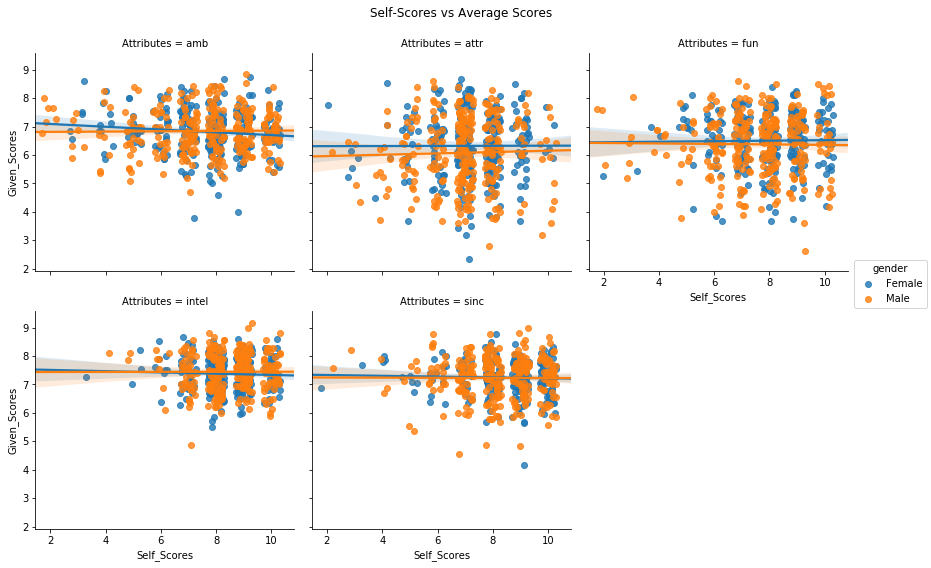

In [26]:
# Getting a dataframe of self-scores to be used for graphing

self_scores = data.loc[:,['gender', 'attr3_1',
                                 'amb3_1','sinc3_1','intel3_1',
                                 'fun3_1']]
self_scores.columns = ['gender', 'attr','amb','sinc','intel','fun']
self_scores_pivot = pd.pivot_table(self_scores,index=["iid",'gender'])
self_scores_stacked = self_scores_pivot.stack()
self_scores_stacked.index.set_names('Attributes', level=len(self_scores_stacked.index.names)-1, inplace=True)
self_scores_stacked = self_scores_stacked.reset_index().rename(columns={0:'Self_Scores'})

# Getting a data frame of given scores used for graphing...

score_averages = speed_dating.groupby(['pid'])['attr', 'sinc', 'intel', 'fun', 'amb', 'dec','gender'].mean()
score_averages_pivot = pd.pivot_table(score_averages,index=["pid",'dec'])
score_averages_stacked = score_averages_pivot.stack()
score_averages_stacked.index.set_names('Attributes', level=len(score_averages_stacked.index.names)-1, inplace=True)
score_averages_stacked = score_averages_stacked.reset_index().rename(columns={0:'Given_Scores'})
score_averages_stacked.columns = ['iid', 'dec','Attributes','Given_Scores']

# Merging two data frames together based on 'iid' and 'Attributes' to be used for graphing

self_and_given_scores = pd.merge(self_scores_stacked, score_averages_stacked, how='inner', on=['iid','Attributes'], left_on=None, right_on=None,
         left_index=True, right_index=True)

g = sns.lmplot(x="Self_Scores", y="Given_Scores", data=self_and_given_scores, hue='gender',
           col='Attributes',col_wrap=3, x_jitter=.3, size=4, aspect=1)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Self-Scores vs Average Scores')
plt.show()

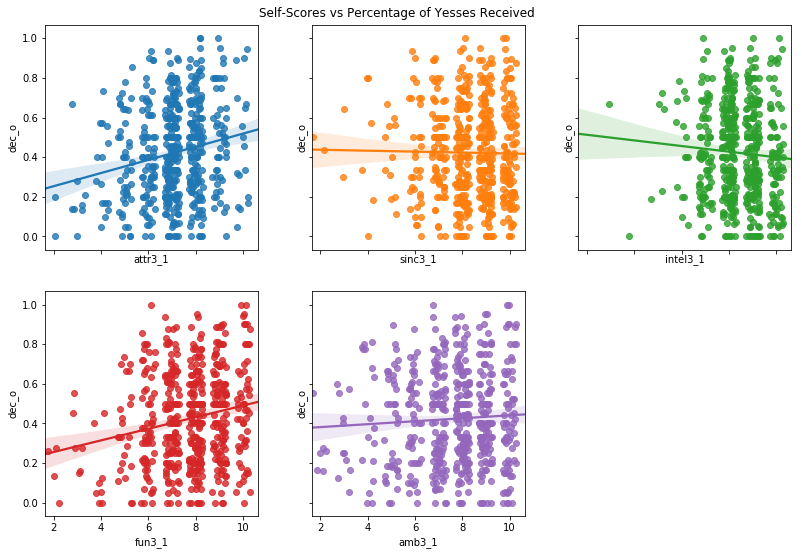

In [27]:
speed_dating2 = speed_dating_download.copy()
score_averages = speed_dating2.groupby(['iid'])['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1','dec_o'].mean().dropna()

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, sharey=True)
fig.tight_layout()
fig.set_size_inches(12, 8)
sns.regplot(x=score_averages.attr3_1 , y=score_averages.dec_o,x_jitter=0.3, ax=ax1)
sns.regplot(x=score_averages.sinc3_1 , y=score_averages.dec_o,x_jitter=0.3, ax=ax2)
sns.regplot(x=score_averages.intel3_1 , y=score_averages.dec_o,x_jitter=0.3, ax=ax3)
sns.regplot(x=score_averages.fun3_1 , y=score_averages.dec_o,x_jitter=0.3, ax=ax4)
sns.regplot(x=score_averages.amb3_1 , y=score_averages.dec_o,x_jitter=0.3, ax=ax5)
plt.delaxes(ax6)
fig.suptitle('Self-Scores vs Percentage of Yesses Received')

plt.show()

In [28]:
speed_dating2 = speed_dating_download.copy()

speed_dating2 = speed_dating2[['dec_o','attr3_1','amb3_1','sinc3_1','intel3_1',
                               'fun3_1','gender']].dropna()

train, test = train_test_split(speed_dating2, test_size = 0.3)


train_X = train[['attr3_1','amb3_1','sinc3_1','intel3_1','fun3_1','gender']]# taking the training data input 
train_y= train.dec_o# This is output of our training data

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}


# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(train_X, train_y)

test_X = test[['attr3_1','amb3_1','sinc3_1','intel3_1','fun3_1','gender']]# taking the training data input 
test_y= test.dec_o# This is output of our training data

pred_y = clf.predict(test_X)

# Accuracy table.
table = pd.crosstab(test_y, pred_y)

print('Using Your Partner\'s Self-scores to predict giving a Yes or No:')
print("Accuracy Score = {}\n".format((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum())))

Using Your Partner's Self-scores to predict giving a Yes or No:
Accuracy Score = 0.6120064464141821



In [29]:
print('Gradient Boosting Classifiers\n')
speed_dating2 = speed_dating_download.copy()

speed_dating2 = speed_dating2[['dec_o','attr3_1','amb3_1','sinc3_1','intel3_1',
                               'fun3_1','gender']].dropna()

train, test = train_test_split(speed_dating2, test_size = 0.3)


train_X = train[['attr3_1','amb3_1','sinc3_1','intel3_1','fun3_1','gender']]# taking the training data input 
train_y= train.dec_o# This is output of our training data

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}


# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(train_X, train_y)

test_X = test[['attr3_1','amb3_1','sinc3_1','intel3_1','fun3_1','gender']]# taking the training data input 
test_y= test.dec_o# This is output of our training data

pred_y = clf.predict(test_X)

# Accuracy table.
table = pd.crosstab(test_y, pred_y)

print('Using Your Partner\'s Self-scores to predict giving a Yes or No:')
print("Accuracy Score = {}\n".format((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum())))


speed_dating2 = speed_dating_download.copy()

speed_dating2 = speed_dating2[['dec', 'prob','attr1_1','amb1_1','sinc1_1','intel1_1',
                               'fun1_1','shar1_1','gender']].dropna()

train, test = train_test_split(speed_dating2, test_size = 0.3)


train_X = train[['attr1_1','amb1_1','sinc1_1','intel1_1','fun1_1','shar1_1','gender']]# taking the training data input 
train_y= train.dec# This is output of our training data

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}


# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(train_X, train_y)

test_X = test[['attr1_1','amb1_1','sinc1_1','intel1_1','fun1_1','shar1_1','gender']]# taking the training data input 
test_y= test.dec# This is output of our training data



pred_y = clf.predict(test_X)

# Accuracy table.
table = pd.crosstab(test_y, pred_y)

print('Using Personal Attribute Importance scores to predict giving a Yes or No:')
print("Accuracy Score = {}\n".format((table.iloc[0,0] + table.iloc[1,1]) / (table.sum().sum())))

speed_dating2 = speed_dating_download.copy()


speed_dating1 = speed_dating2[['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']].dropna()
#now split our data into train and test

train, test = train_test_split(speed_dating1, test_size = 0.3)


train_X = train[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']]# taking the training data input 
train_y= train.dec# This is output of our training data

# same we have to do for test
test_X= test[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like','gender']] # taking test data inputs
test_y = test.dec   #output value of test data

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}


# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(train_X, train_y)

prediction = clf.predict(test_X)
print('Using Attribute Scores to predict giving a Yes or No:\nAccuracy Score: {}\n'.format(metrics.accuracy_score(prediction,test_y)))

Gradient Boosting Classifiers

Using Your Partner's Self-scores to predict giving a Yes or No:
Accuracy Score = 0.6148267526188558

Using Personal Attribute Importance scores to predict giving a Yes or No:
Accuracy Score = 0.6214405360134003

Using Attribute Scores to predict giving a Yes or No:
Accuracy Score: 0.7735042735042735



Random Forrest Classifier Accuracy = 0.8074291300097751
Gradient Boosting Classifier Accuracy = 0.804496578690127


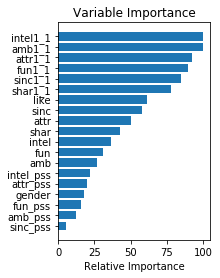

1_1 - Attribute Importance
_pss - Partner's Self Score


In [30]:
speed_dating2 = speed_dating_download.copy()

self_scores = speed_dating2[['iid','pid','attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']]
speed_to_merge = speed_dating2[['iid','pid','attr1_1','amb1_1','sinc1_1','intel1_1','fun1_1',
                                'shar1_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like',
                                'dec','gender']]
self_scores.columns = ['pid', 'iid','attr_pss','sinc_pss','intel_pss','fun_pss','amb_pss']
self_scores.head()

merged =  pd.merge(self_scores, speed_to_merge, on=['iid', 'pid'])
merged = merged.dropna()

speed_dating2 = merged.sample(frac=1)

train, test = train_test_split(speed_dating2, test_size = 0.3)


train_X = train[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like',
                 'attr_pss','sinc_pss','intel_pss','fun_pss','amb_pss','attr1_1',
                 'amb1_1','sinc1_1','intel1_1','fun1_1','shar1_1','gender']]# taking the training data input 
train_y= train.dec# This is output of our training data

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}


# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(train_X, train_y)

test_X = test[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 
                 'attr_pss','sinc_pss','intel_pss','fun_pss','amb_pss',
               'attr1_1','amb1_1','sinc1_1','intel1_1','fun1_1',
               'shar1_1','gender']]# taking the training data input 
test_y = test.dec# This is output of our training data



model=RandomForestClassifier(n_estimators=100)# a simple random forest model

model.fit(train_X,train_y)

prediction = model.predict(test_X)

print('Random Forrest Classifier Accuracy = {}'.format(metrics.accuracy_score(prediction,test_y)))

pred_y = clf.predict(test_X)

# Accuracy table.
# table = pd.crosstab(test_y, pred_y)

print("Gradient Boosting Classifier Accuracy = {}".format(metrics.accuracy_score(pred_y,test_y)))


feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

print('1_1 - Attribute Importance\n_pss - Partner\'s Self Score')

Conclusion: 
- There isn't much you can do to make yourself more 'marketable'.
- The best you can do is to be yourself and be as aware as possible of when somebody else authentically likes you and just go from there.

Ideas for Future Models:

- Race- Paper already written by Fisher and Iyengar in [Racial Preferences in Dating](http://faculty.chicagobooth.edu/emir.kamenica/documents/racialpreferences.pdf)
- Dating Habits
- Financial Status
- Location
- Age differences

References

Fisher, R. & Iyengar, S. (2004). Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment \[Data file and code book\]. Retrieved from http://www.stat.columbia.edu/~gelman/arm/examples/speed.dating/

Montoya, A. (2015). Speed Dating Experiment
What attributes influence the selection of a romantic partner?. Retrieved from https://www.kaggle.com/annavictoria/speed-dating-experiment